<a href="https://colab.research.google.com/github/anveshkumar0206/waste_classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [ ]:
import os
from PIL import Image
from tqdm import tqdm

# Get the current working directory
cwd = os.getcwd()

# Define the path to your dataset folder (relative to the current working directory)
dataset_folder = os.path.join(cwd, "dataset-resized")

# List of categories (folder names)
categories = os.listdir(dataset_folder)

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through each category
for category in categories:
    category_folder = os.path.join(dataset_folder, category)

    # Loop through each image file in the category folder
    for filename in tqdm(os.listdir(category_folder), desc=f"Loading {category}"):
        image_path = os.path.join(category_folder, filename)

        # Open the image using PIL
        image = Image.open(image_path)

        # Append the image data and label to the lists
        data.append(image)
        labels.append(category)

# Print the total number of images loaded
print("Total images loaded:", len(data))


Loading trash: 100%|██████████| 137/137 [00:00<00:00, 924.95it/s]

Total images loaded: 2527


In [ ]:
import numpy as np
flat_data_arr=[]
target_arr=[]
Categories=['cardboard','glass','metal', 'paper', 'plastic', 'trash']

for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(dataset_folder,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : cardboard
loaded category:cardboard successfully
loading... category : glass
loaded category:glass successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : trash
loaded category:trash successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.949531,0.792669,0.655414,0.953784,0.796921,0.659666,0.952151,0.795288,0.658033,0.952934,...,0.440709,0.342670,0.256395,0.445871,0.347832,0.261557,0.449586,0.351547,0.265273,0
1,0.815437,0.713476,0.623280,0.820636,0.718676,0.628480,0.818293,0.716332,0.626136,0.819090,...,0.668787,0.566826,0.476630,0.671630,0.569669,0.479473,0.654456,0.552495,0.462299,0
2,0.970860,0.959095,0.939487,0.966222,0.954457,0.934849,0.953305,0.941540,0.921932,0.943040,...,0.830108,0.830108,0.830108,0.829186,0.829186,0.829186,0.818301,0.818301,0.818301,0
3,0.324622,0.222662,0.124622,0.338822,0.236861,0.138822,0.347629,0.245668,0.147629,0.348951,...,0.727330,0.660664,0.582232,0.728569,0.661902,0.583471,0.728570,0.661904,0.583472,0
4,0.551617,0.445734,0.339852,0.556793,0.450911,0.345028,0.531059,0.425177,0.319294,0.518300,...,0.851428,0.852141,0.819974,0.881340,0.884879,0.864912,0.902483,0.899736,0.880128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,0.913725,0.854902,0.780392,0.913683,0.854860,0.780350,0.911086,0.852262,0.777752,0.909807,...,0.399490,0.364196,0.305372,0.392215,0.356921,0.298097,0.392097,0.356803,0.297979,5
2523,0.913725,0.862745,0.788235,0.913725,0.862745,0.788235,0.913725,0.862745,0.788235,0.913725,...,0.209886,0.158906,0.084396,0.228973,0.177993,0.103483,0.232201,0.181221,0.106711,5
2524,0.879036,0.812370,0.741782,0.884280,0.817613,0.747025,0.886193,0.819527,0.748938,0.882454,...,0.352996,0.317702,0.258878,0.351302,0.316008,0.257184,0.346787,0.311493,0.252670,5
2525,0.847059,0.796078,0.721569,0.847059,0.796079,0.721569,0.847099,0.796119,0.721609,0.847119,...,0.341176,0.305882,0.247059,0.341176,0.305882,0.247059,0.341176,0.305882,0.247059,5


In [ ]:
# Feature extraction

In [ ]:

import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from imutils import paths

def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to ensure consistency
    gray_image = cv2.resize(gray_image, (128, 128))

    # 1. Edge Detection using the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # 2. Texture Features using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # 3. Color Histograms
    # Assuming you may want color histograms, we need to read the image in color mode and resize it
    color_image = cv2.imread(image_path)
    color_image = cv2.resize(color_image, (128, 128))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()

    return edges, lbp_hist, color_hist

# Example usage
image_paths = list(paths.list_images("C:/Users/Checkout/Downloads/dataset-resized"))

# Iterate through the image paths, extracting and plotting features for each image
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)

        # Plotting the features
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(edges, cmap='gray')
        ax[0].set_title('Canny Edges')
        ax[1].bar(range(len(lbp_hist)), lbp_hist)
        ax[1].set_title('LBP Histogram')
        ax[2].bar(range(len(color_hist)), color_hist)
        ax[2].set_title('Color Histogram')
        plt.show()
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")


In [ ]:
# SVM with features used from feature extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import SVM classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage import feature
from imutils import paths

# Prepare Data
image_paths = list(paths.list_images("newdata/dataset-resized"))
data = []
labels = []

# Extract Features and Labels
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)
        features = np.hstack([edges.flatten(), lbp_hist, color_hist])
        data.append(features)

        # Extract label from image_path, assuming the folder name is the class label
        label = image_path.split("/")[-2]  # Assuming Unix-style paths
        labels.append(label)
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

# Create Feature Matrix and Labels
x = np.array(data)
y = np.array(labels)

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train SVM Classifier
svm_clf = SVC()  # Initialize SVM classifier
svm_clf.fit(x_train, y_train)

# Evaluate the Model
y_pred = svm_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('SVM classifier confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=77)

# Train the classifier
svm_classifier.fit(x_train_scaled, y_train)


SVC(kernel='linear', random_state=77)

In [ ]:
# evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = svm_classifier.predict(x_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.4624505928853755
              precision    recall  f1-score   support

           0       0.46      0.54      0.50        81
           1       0.40      0.46      0.43       100
           2       0.33      0.27      0.30        82
           3       0.65      0.52      0.58       119
           4       0.46      0.54      0.50        97
           5       0.36      0.30      0.33        27

    accuracy                           0.46       506
   macro avg       0.45      0.44      0.44       506
weighted avg       0.47      0.46      0.46       506

Confusion Matrix:
[[44 11  6  7 10  3]
 [ 5 46 17  5 26  1]
 [12 21 22 11  8  8]
 [19 13 10 62 15  0]
 [10 16 11  6 52  2]
 [ 5  8  1  4  1  8]]


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='poly', random_state=77)

# Train the classifier
svm_classifier.fit(x_train_scaled, y_train)
# evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = svm_classifier.predict(x_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.48221343873517786
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        81
           1       0.61      0.33      0.43       100
           2       0.52      0.18      0.27        82
           3       0.58      0.54      0.56       119
           4       0.33      0.81      0.47        97
           5       0.50      0.11      0.18        27

    accuracy                           0.48       506
   macro avg       0.54      0.43      0.43       506
weighted avg       0.55      0.48      0.47       506

Confusion Matrix:
[[50  1  5 11 13  1]
 [ 2 33  4  9 52  0]
 [ 7  6 15 13 39  2]
 [ 7  2  3 64 43  0]
 [ 2  5  2  9 79  0]
 [ 1  7  0  4 12  3]]


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='rbf', random_state=77)

# Train the classifier
svm_classifier.fit(x_train_scaled, y_train)
# evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = svm_classifier.predict(x_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        81
           1       0.51      0.53      0.52       100
           2       0.65      0.54      0.59        82
           3       0.63      0.81      0.71       119
           4       0.63      0.66      0.65        97
           5       0.69      0.33      0.45        27

    accuracy                           0.64       506
   macro avg       0.66      0.59      0.61       506
weighted avg       0.64      0.64      0.63       506

Confusion Matrix:
[[56  2  6 12  4  1]
 [ 3 53 10 18 16  0]
 [ 3  9 44 15  9  2]
 [ 3 12  2 96  6  0]
 [ 2 16  3 11 64  1]
 [ 1 12  3  0  2  9]]


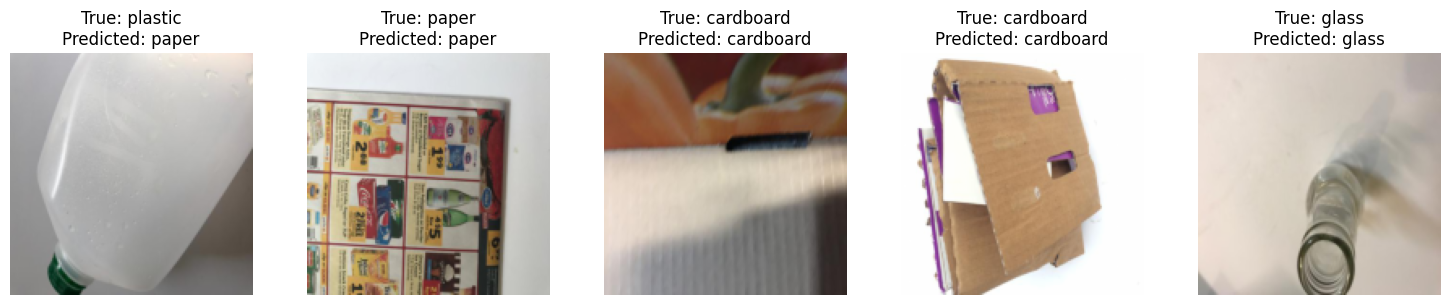

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your dataset loaded in x_test and y_test

# Generate random indices to select 5 images
random_indices = random.sample(range(len(x_test)), 5)

# Determine the number of images to display (min between 5 and the length of x_test)
num_images = min(5, len(random_indices))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i, idx in enumerate(random_indices):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[idx].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[idx].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[idx]]  # Assuming you have defined Categories
    predicted_label = Categories[y_pred[idx]]  # Assuming you have defined Categories
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# Initialize the SVM classifier
svm_classifier = SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the classifier with the best parameters
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = best_svm_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print(classification_report(y_test, y_pred))

# Optional: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.6304347826086957
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        81
           1       0.65      0.54      0.59       100
           2       0.58      0.44      0.50        82
           3       0.53      0.86      0.66       119
           4       0.73      0.68      0.70        97
           5       0.67      0.44      0.53        27

    accuracy                           0.63       506
   macro avg       0.66      0.59      0.61       506
weighted avg       0.65      0.63      0.63       506

Confusion Matrix:
[[ 49   0   2  25   4   1]
 [  3  54   9  23  10   1]
 [  2   9  36  27   5   3]
 [  1   6   6 102   4   0]
 [  5   9   4  12  66   1]
 [  1   5   5   2   2  12]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity for each class
sensitivity_per_class = []
specificity_per_class = []
for i in range(conf_matrix.shape[0]):
    true_positives = conf_matrix[i, i]
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_negatives - false_positives

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)

    sensitivity_per_class.append(sensitivity)
    specificity_per_class.append(specificity)

# Calculate average sensitivity and specificity
average_sensitivity = np.mean(sensitivity_per_class)
average_specificity = np.mean(specificity_per_class)

print("Average Sensitivity:", average_sensitivity)
print("Average Specificity:", average_specificity)


Average Sensitivity: 0.5943270557616939
Average Specificity: 0.9225650715200252


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score

svm_classifier = SVC(kernel='rbf', random_state=77)

# Train the classifier
svm_classifier.fit(x_train, y_train)
# evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = svm_classifier.predict(x_test)

# Print additional metrics
y_pred_rf = svm_classifier.predict(x_test)
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf, average='macro'))
print('Precision:', precision_score(y_test, y_pred_rf, average='macro'))
print('Recall:', recall_score(y_test, y_pred_rf, average='macro'))
print('Jaccard:', jaccard_score(y_test, y_pred_rf, average='macro'))

Balanced Accuracy: 0.5778075626330461
F1 Score: 0.5954201144815149
Precision: 0.6454002751400215
Recall: 0.5778075626330461
Jaccard: 0.4301148618032495
